Data Science Project 4 - Predicting Housing Prices using Advanced Regression Techniques.

Nama: Inne Andarini

Dataset from: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

# 1. Import Library dan Dataset

In [1]:
#Standard libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load the data to dataframe pandas
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# 2. Exploratory Data Analysis

## 2.1 Menampilkan baris pada DataFrame

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## 2.2 Menampilkan informasi umum dari DataFrame

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2.3 Data Preparation

Kolom yang dipilih adalah kolom yang memiliki pengaruh peluang yang cukup besar terhadap 'SalePrice'.

In [6]:
sorted_correlations = df_train.select_dtypes(include=['float64', 'int64']).corr()['SalePrice'].abs().sort_values(ascending=False)
print(sorted_correlations)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [7]:
df_train = df_train[['SalePrice', 'OverallQual', 'OverallCond', 'KitchenQual','GrLivArea', 'GarageArea', 'TotalBsmtSF','1stFlrSF', 'YearBuilt','MiscFeature', 'LotArea']] 

In [8]:
df_train

,SalePrice,OverallQual,OverallCond,KitchenQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,MiscFeature,LotArea
0,208500,7,5,Gd,1710,548,856,856,2003,NaN,8450
1,181500,6,8,TA,1262,460,1262,1262,1976,NaN,9600
2,223500,7,5,Gd,1786,608,920,920,2001,NaN,11250
3,140000,7,5,Gd,1717,642,756,961,1915,NaN,9550
4,250000,8,5,Gd,2198,836,1145,1145,2000,NaN,14260
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,5,TA,1647,460,953,953,1999,NaN,7917
1456,210000,6,6,TA,2073,500,1542,2073,1978,NaN,13175
1457,266500,7,9,Gd,2340,252,1152,1188,1941,Shed,9042
1458,142125,5,6,Gd,1078,240,1078,1078,1950,NaN,9717


In [9]:
df_test = df_test[['OverallQual', 'OverallCond', 'KitchenQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF','1stFlrSF', 'YearBuilt','MiscFeature', 'LotArea']] 

In [10]:
df_test

,OverallQual,OverallCond,KitchenQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,MiscFeature,LotArea
0,5,6,TA,896,730.0,882.0,896,1961,NaN,11622
1,6,6,Gd,1329,312.0,1329.0,1329,1958,Gar2,14267
2,5,5,TA,1629,482.0,928.0,928,1997,NaN,13830
3,6,6,Gd,1604,470.0,926.0,926,1998,NaN,9978
4,8,5,Gd,1280,506.0,1280.0,1280,1992,NaN,5005
...,...,...,...,...,...,...,...,...,...,...
1454,4,7,TA,1092,0.0,546.0,546,1970,NaN,1936
1455,4,5,TA,1092,286.0,546.0,546,1970,NaN,1894
1456,5,7,TA,1224,576.0,1224.0,1224,1960,NaN,20000
1457,5,5,TA,970,0.0,912.0,970,1992,Shed,10441


In [11]:
#Menampilkan statistik deskriptif untuk df_train
df_train.describe()

,SalePrice,OverallQual,OverallCond,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,LotArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,5.575342,1515.463699,472.980137,1057.429452,1162.626712,1971.267808,10516.828082
std,79442.502883,1.382997,1.112799,525.480383,213.804841,438.705324,386.587738,30.202904,9981.264932
min,34900.000000,1.000000,1.000000,334.000000,0.000000,0.000000,334.000000,1872.000000,1300.000000
25%,129975.000000,5.000000,5.000000,1129.500000,334.500000,795.750000,882.000000,1954.000000,7553.500000
50%,163000.000000,6.000000,5.000000,1464.000000,480.000000,991.500000,1087.000000,1973.000000,9478.500000
75%,214000.000000,7.000000,6.000000,1776.750000,576.000000,1298.250000,1391.250000,2000.000000,11601.500000
max,755000.000000,10.000000,9.000000,5642.000000,1418.000000,6110.000000,4692.000000,2010.000000,215245.000000


In [12]:
df_train.OverallQual.value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

In [13]:
df_train.OverallCond.value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [14]:
df_train.KitchenQual.value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [15]:
df_train.YearBuilt.value_counts()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

In [16]:
df_train.dtypes

SalePrice       int64
OverallQual     int64
OverallCond     int64
KitchenQual    object
GrLivArea       int64
GarageArea      int64
TotalBsmtSF     int64
1stFlrSF        int64
YearBuilt       int64
MiscFeature    object
LotArea         int64
dtype: object

In [17]:
df_train.isna().sum()

SalePrice         0
OverallQual       0
OverallCond       0
KitchenQual       0
GrLivArea         0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
YearBuilt         0
MiscFeature    1406
LotArea           0
dtype: int64

Terdapat missing value pada kolom 'MiscFeature'

## 2.4 Data Visualization

### 2.4.1 Histogram dari kolom target 'SalePrice' dalam df_train

<Axes: xlabel='SalePrice', ylabel='Count'>

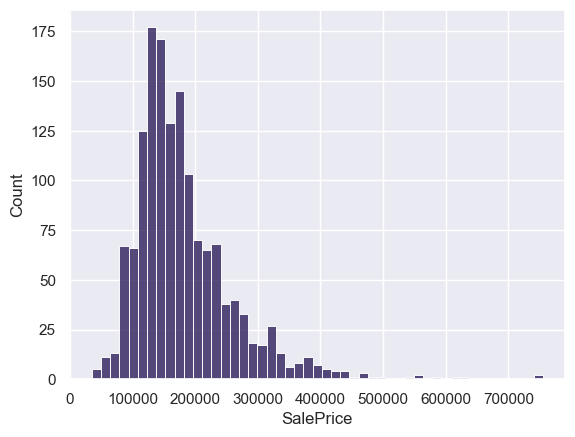

In [18]:
sns.set_theme(palette='magma')
sns.histplot(df_train['SalePrice'])

In [19]:
#Mengukur skewness dan kurtosis
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


### 2.4.2 Scatter plot hubungan GrLivArea terhadap variabel target 'SalePrice'

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

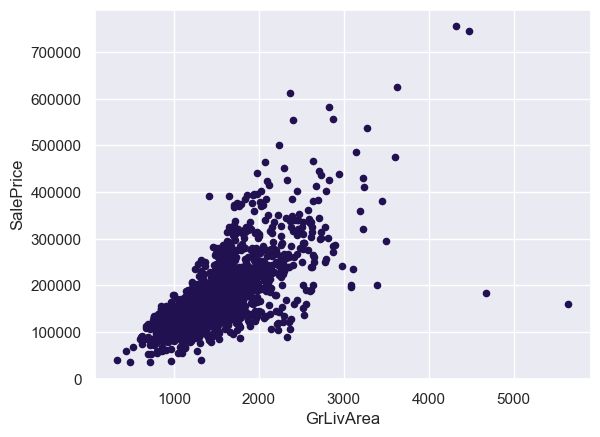

In [20]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

### 2.4.3 Scatter plot hubungan 'GarageArea' terhadap variabel target 'SalePrice'

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

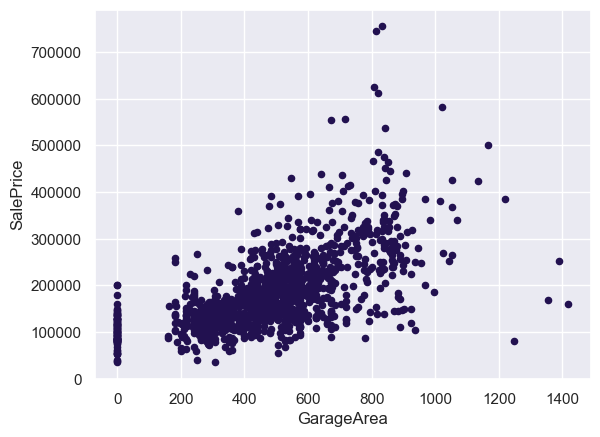

In [21]:
df_train.plot.scatter(x='GarageArea', y='SalePrice')

### 2.4.4 Scatter plot hubungan 'TotalBsmtSF' terhadap variabel target 'SalePrice'

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

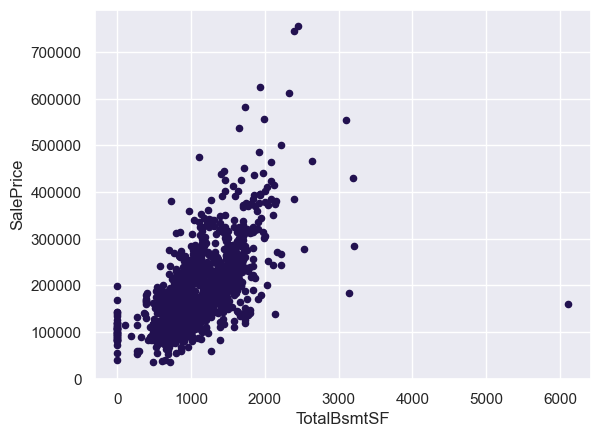

In [22]:
df_train.plot.scatter(x='TotalBsmtSF', y='SalePrice')

### 2.4.5 Scatter plot hubungan '1stFlrSF' terhadap variabel target 'SalePrice'

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

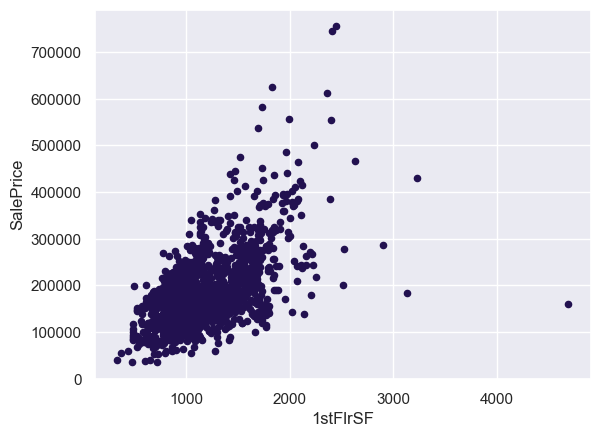

In [23]:
df_train.plot.scatter(x='1stFlrSF', y='SalePrice')

### 2.4.6 Boxplot hubungan 'OverallQual' dengan 'SalePrice'

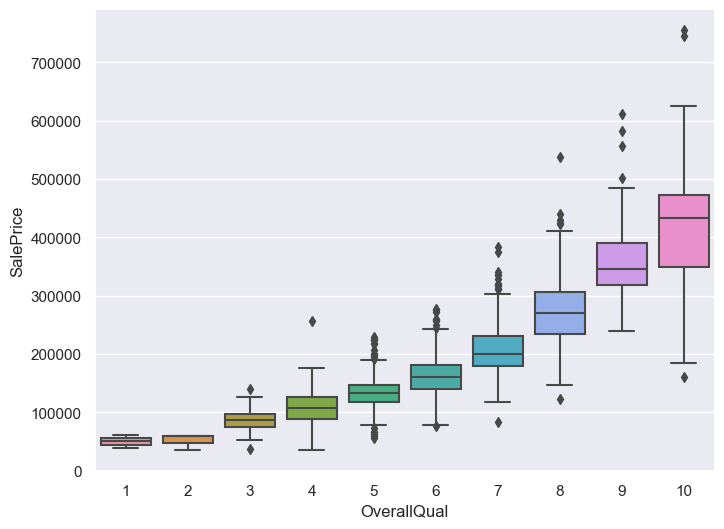

In [24]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax=plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)

In [25]:
df_train[((df_train['OverallQual']==10)&(df_train['SalePrice']<200000))]

,SalePrice,OverallQual,OverallCond,KitchenQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,MiscFeature,LotArea
523,184750,10,5,Ex,4676,884,3138,3138,2007,NaN,40094
1298,160000,10,5,Ex,5642,1418,6110,4692,2008,NaN,63887


### 2.4.7 Boxplot hubungan 'YearBuilt' dengan 'SalePrice'

In [26]:
#Tahun berapa rumah yang baru dibangun?
df_train['YearBuilt'].max()

2010

In [27]:
#Tahun berapa rumah yang lama dibangun?
df_train['YearBuilt'].min()

1872

In [28]:
df_train['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

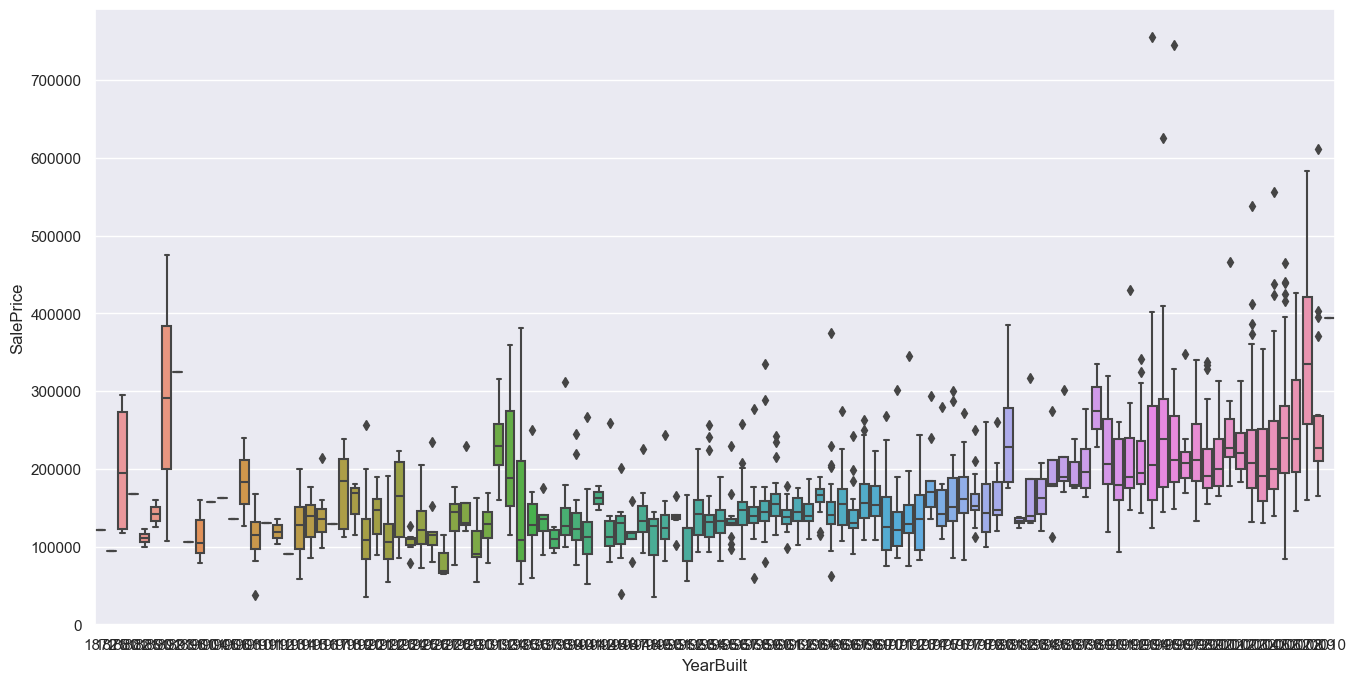

In [29]:
#Hubungan 'YearBuilt' dengan SalePrice
data = pd.concat([df_train['SalePrice'],df_train['YearBuilt']], axis =1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)

### 2.4.8 Boxplot hubungan 'OverallCond' dengan 'SalePrice'

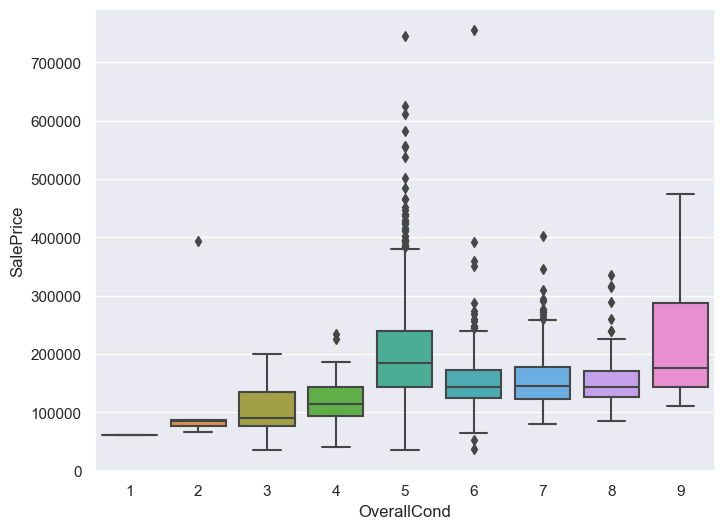

In [30]:
data = pd.concat([df_train['SalePrice'], df_train['OverallCond']], axis=1)
f, ax=plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallCond', y='SalePrice', data=data)

### 2.4.9 Boxplot hubungan 'KitchenQual' dengan 'SalePrice'

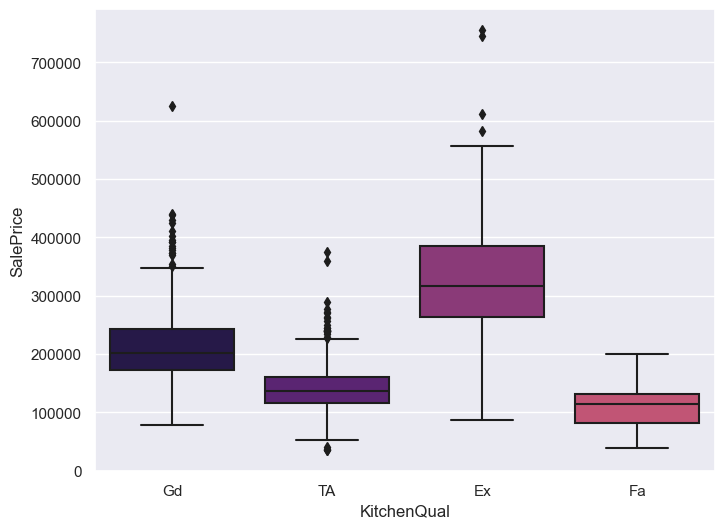

In [31]:
data = pd.concat([df_train['SalePrice'], df_train['KitchenQual']], axis=1)
f, ax=plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='KitchenQual', y='SalePrice', data=data)

### 2.4.10 Correlation map antar variabel

In [32]:
df_train.dtypes

SalePrice       int64
OverallQual     int64
OverallCond     int64
KitchenQual    object
GrLivArea       int64
GarageArea      int64
TotalBsmtSF     int64
1stFlrSF        int64
YearBuilt       int64
MiscFeature    object
LotArea         int64
dtype: object

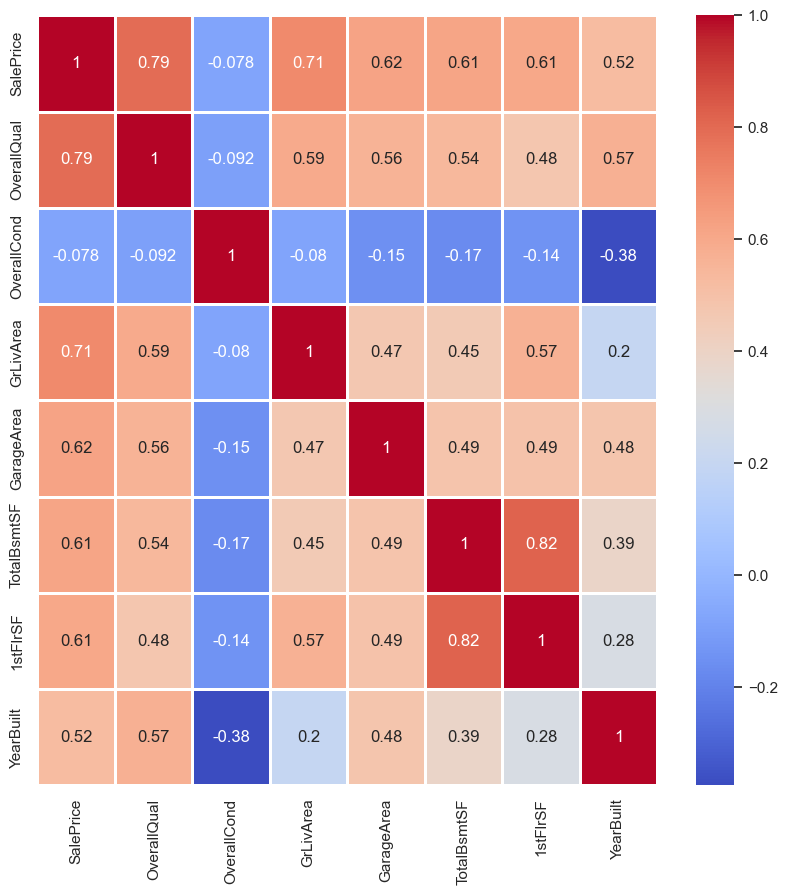

In [33]:
df_corr = ['SalePrice', 'OverallQual', 'OverallCond','GrLivArea','GarageArea', 'TotalBsmtSF', '1stFlrSF','YearBuilt']
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_train[df_corr].corr(), cmap = 'coolwarm', annot=True, linewidth=2)

In [34]:
#Setiap kolomnya bandingkan dengan 'SalePrice'
high_corr = df_train[df_corr].corr()
high_corr['SalePrice']

SalePrice      1.000000
OverallQual    0.790982
OverallCond   -0.077856
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
YearBuilt      0.522897
Name: SalePrice, dtype: float64

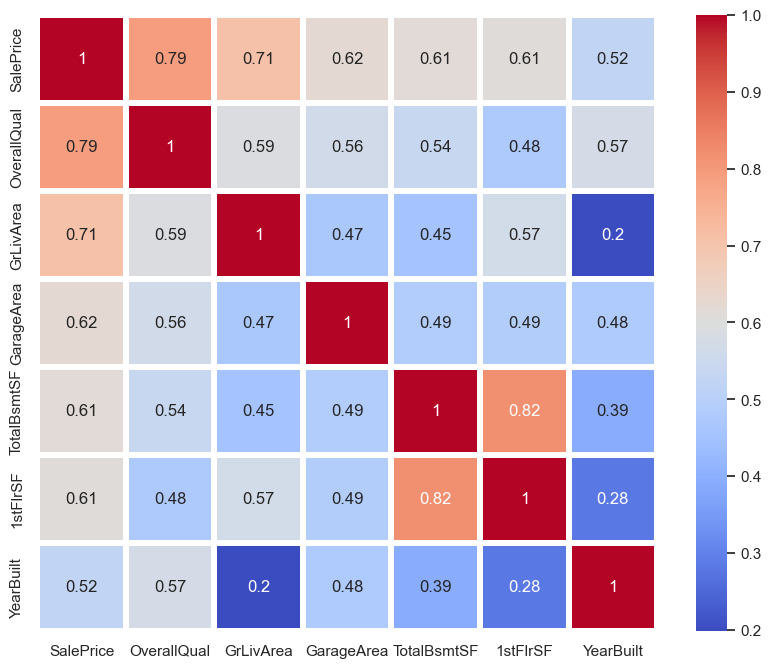

In [35]:
#Menampilkan correlation map untuk kolom dengan nilai korelasinya >=0.5
hig_corr_features = high_corr.index[abs(high_corr['SalePrice'])>=0.5]

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap ='coolwarm',annot=True, linewidth=3)

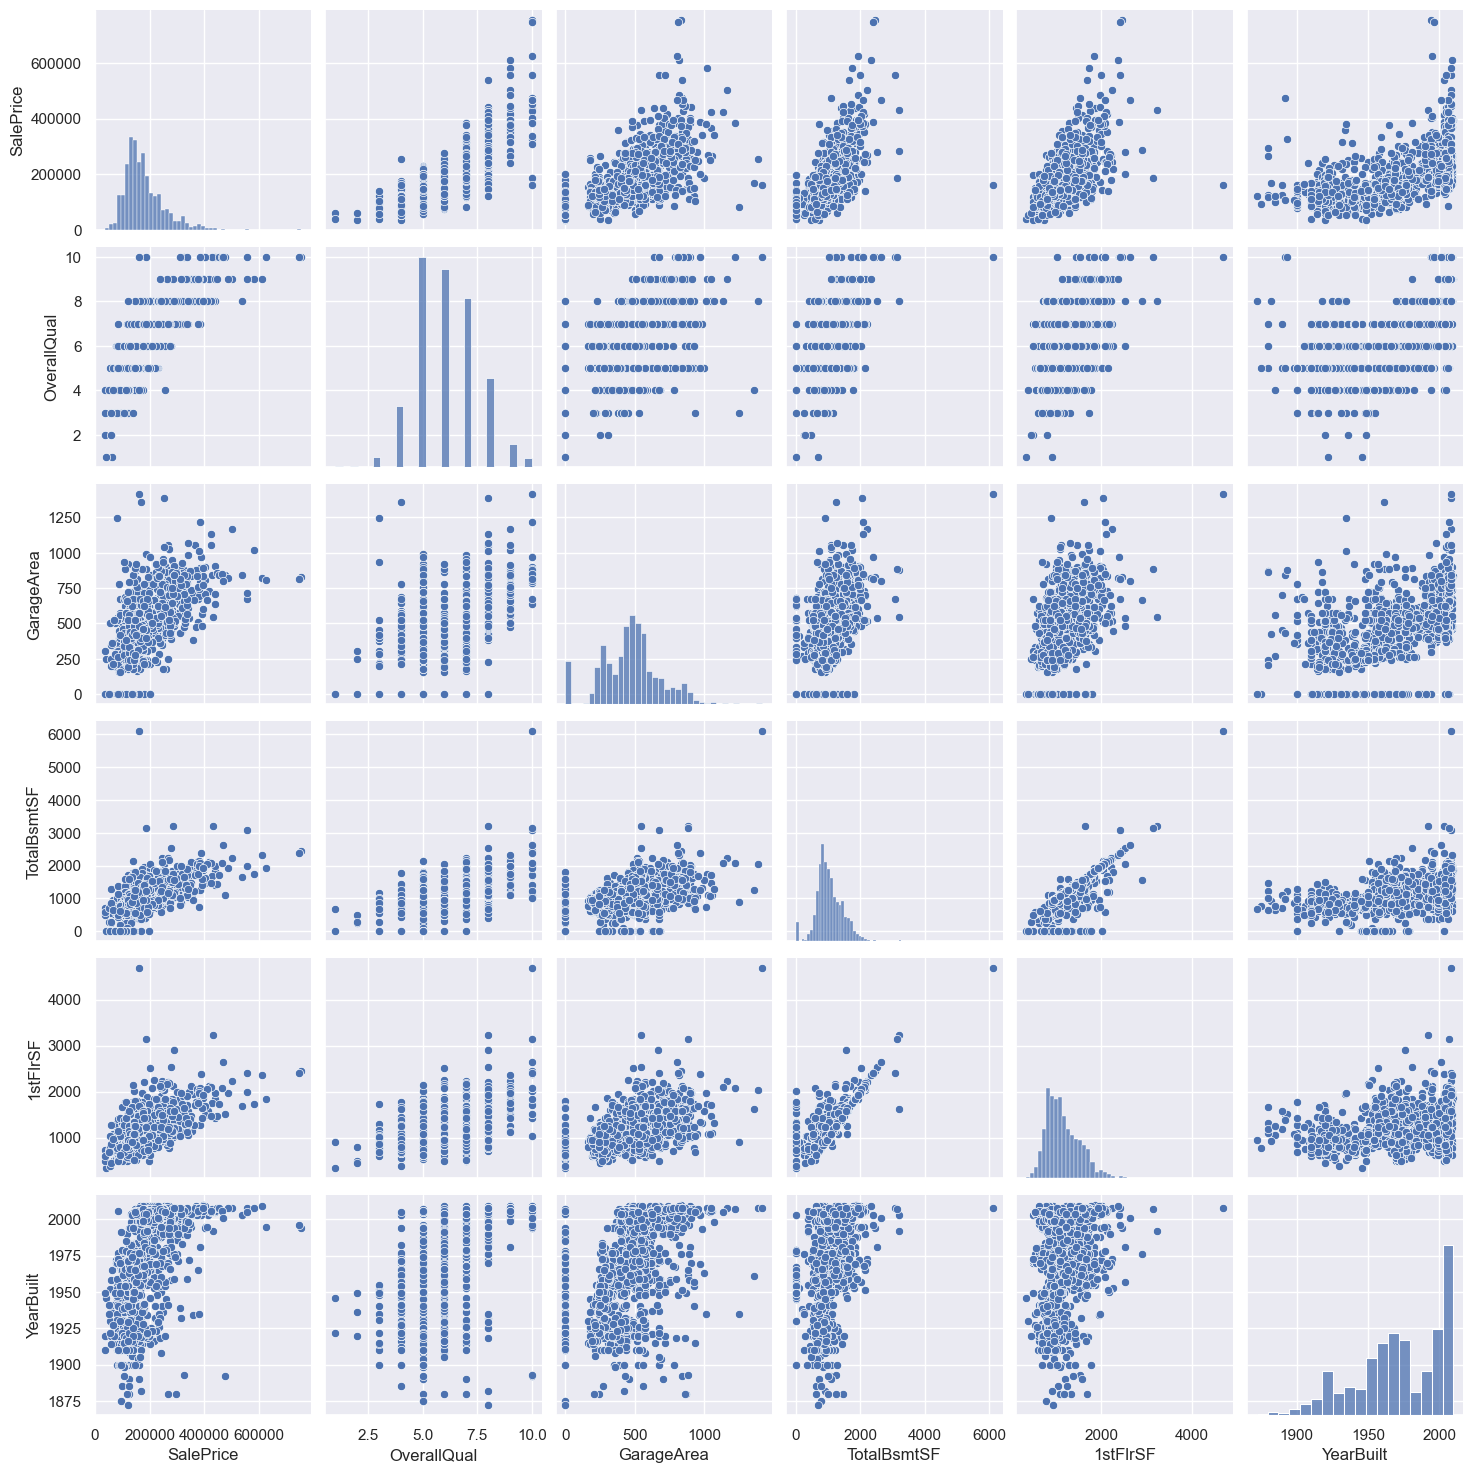

In [36]:
#Membuat grafik pairplot untuk kolom dengan korelasi >0.5
sns.set()
cols = ['SalePrice', 'OverallQual', 'GarageArea', 'TotalBsmtSF', '1stFlrSF','YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

### 2.4.11 Variabel target 'SalePrice'

Comparing salePrice dengan distribusi normal

<Axes: xlabel='SalePrice', ylabel='Density'>

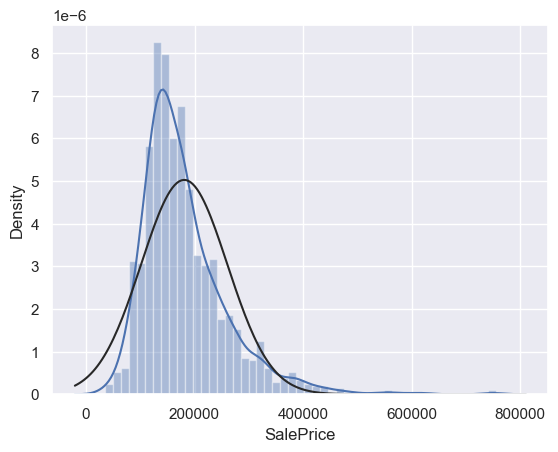

In [37]:
sns.distplot(df_train['SalePrice'], fit=norm)

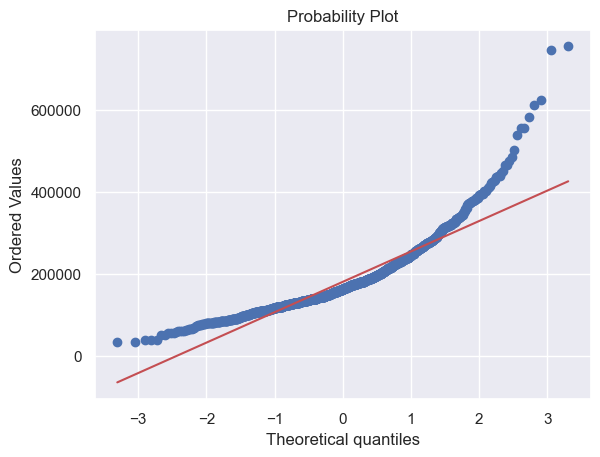

In [38]:
#QQ-Plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

### 2.4.12 Log Transformation for Variable Target 'SalePrice'

hal ini bertujuan untuk mengurangi skewness atau ketidaksimetrisan distribusi dan membuat distribusi tersebut lebih mendekati distribusi normal.

In [39]:
#Harga jual rumah 'SalePrice' tertinggi
df_train['SalePrice'].max()

755000

In [40]:
df_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Mengubah nilai kolom 'SalePrice' dengan fungsi logaritma natural menjadi nilai lain tanpa mengubah persebaran distribusinya.

In [41]:
# log1p merupakan fungsi logaritma natural
np.log1p(755000) #In(1+x)

13.534474352733596

In [42]:
df_train['SalePrice'].mean()

180921.19589041095

In [43]:
np.log1p(180921)

12.10582127814045

In [44]:
#Copy dataframe df_train menjadi dataframe baru
df_train_tf = df_train.copy()

#use numpy function log1p whic applies In(1+x) to all elements of the column
df_train_tf['SalePrice'] = np.log1p(df_train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

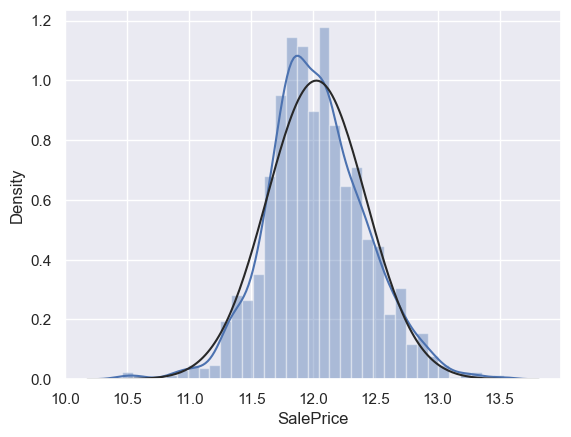

In [45]:
#Check the new distribution using distplot
sns.distplot(df_train_tf['SalePrice'], fit=norm)

Garis hitam merupakan garis distribusi normal.
Garis biru merupakan garis distribusi 'SalePrice' yang sudah dilakukan fungsi lagoritma natural. Persebarannya tetap terjaga tapi distribusinya mendekati normal.

In [46]:
#Statistik deskriptif kolom 'SalePrice' yang baru
df_train_tf['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

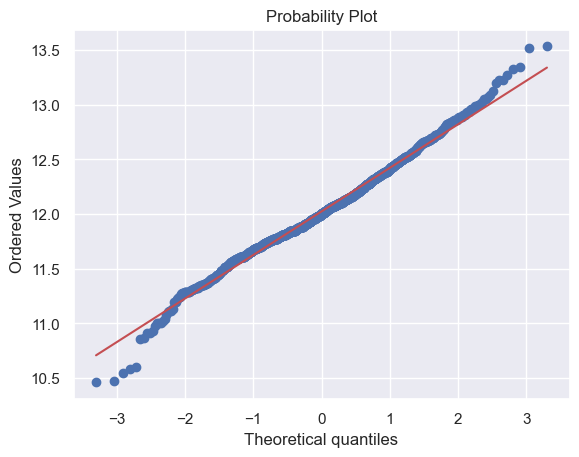

In [47]:
#Check kemabli dengan QQ Plot
fig = plt.figure()
res = stats.probplot(df_train_tf['SalePrice'], plot=plt)
plt.show()

# 3. Data Pre-Processing

**Menggabungkan Train dan Test Set**

In [48]:
ntrain = df_train_tf.shape[0]
ntest = df_test.shape[0]
y_train = df_train_tf.SalePrice.values
all_data = pd.concat((df_train_tf, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 10)


In [49]:
print(ntrain, ntest)

1460 1459


## 3.1 Data Cleaning

In [50]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MiscFeature,2814,96.402878
KitchenQual,1,0.034258
GarageArea,1,0.034258
TotalBsmtSF,1,0.034258
OverallQual,0,0.000000
OverallCond,0,0.000000
GrLivArea,0,0.000000
1stFlrSF,0,0.000000
YearBuilt,0,0.000000
LotArea,0,0.000000


Kolom 'MiscFeature' terdapat missing value sebanyak 2814. KitchenQual dan GarageArea sebanyak 1 missing value

In [51]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [52]:
all_data['MiscFeature'].value_counts()

MiscFeature
None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: count, dtype: int64

In [53]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [54]:
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

In [55]:
all_data['KitchenQual'].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [56]:
#Mengisikan missing value dengan kualitas dapur yang paling sering muncul
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [57]:
#Check remaining missing values if any
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [58]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  2919 non-null   int64  
 1   OverallCond  2919 non-null   int64  
 2   KitchenQual  2919 non-null   object 
 3   GrLivArea    2919 non-null   int64  
 4   GarageArea   2919 non-null   float64
 5   TotalBsmtSF  2919 non-null   float64
 6   1stFlrSF     2919 non-null   int64  
 7   YearBuilt    2919 non-null   int64  
 8   MiscFeature  2919 non-null   object 
 9   LotArea      2919 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 228.2+ KB


In [59]:
#Changing OverallQual and OverallCond into a categorical variable
#tipe data dari interger to categorical ordinal
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [60]:
all_data

,OverallQual,OverallCond,KitchenQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,MiscFeature,LotArea
0,7,5,Gd,1710,548.0,856.0,856,2003,None,8450
1,6,8,TA,1262,460.0,1262.0,1262,1976,None,9600
2,7,5,Gd,1786,608.0,920.0,920,2001,None,11250
3,7,5,Gd,1717,642.0,756.0,961,1915,None,9550
4,8,5,Gd,2198,836.0,1145.0,1145,2000,None,14260
...,...,...,...,...,...,...,...,...,...,...
2914,4,7,TA,1092,0.0,546.0,546,1970,None,1936
2915,4,5,TA,1092,286.0,546.0,546,1970,None,1894
2916,5,7,TA,1224,576.0,1224.0,1224,1960,None,20000
2917,5,5,TA,970,0.0,912.0,970,1992,Shed,10441


Mengubah kolom kategorikal menjadi numerikal untuk bisa dibaca oleh machine learning dengan cara Feature Engineering

## 3.2 Data Transformation

### 3.2.1 Feature Engineering

**Label Encoding**
Mengubah label value dari feature-feature yang kategorikal. 
disisakan MiscFeature karena kategorikal nominal bukan kategorikal ordinal. 
Label Encoding untuk tipe data yang bertipe kategorikal ordinal (yang mempunyai tingkatan).

In [61]:
#Mempertahankan data original
tmp_data = all_data.copy()

In [62]:
from sklearn.preprocessing import LabelEncoder
cols = ('OverallQual', 'OverallCond', 'KitchenQual') #masih sisa 'MiscFeature'
encoders = {}

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(tmp_data[c].values))
    tmp_data[c] = lbl.transform(list(tmp_data[c].values))
    encoders[c] = lbl # encoder untuk tiap kolom kita simpan untuk deployment nanti

# shape
print('Shape tmp_data: {}'.format(tmp_data.shape))

Shape tmp_data: (2919, 10)


In [63]:
tmp_data

,OverallQual,OverallCond,KitchenQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,MiscFeature,LotArea
0,7,4,2,1710,548.0,856.0,856,2003,None,8450
1,6,7,3,1262,460.0,1262.0,1262,1976,None,9600
2,7,4,2,1786,608.0,920.0,920,2001,None,11250
3,7,4,2,1717,642.0,756.0,961,1915,None,9550
4,8,4,2,2198,836.0,1145.0,1145,2000,None,14260
...,...,...,...,...,...,...,...,...,...,...
2914,4,6,3,1092,0.0,546.0,546,1970,None,1936
2915,4,4,3,1092,286.0,546.0,546,1970,None,1894
2916,5,6,3,1224,576.0,1224.0,1224,1960,None,20000
2917,5,4,3,970,0.0,912.0,970,1992,Shed,10441


**Skewness Treatment untuk Features**

In [64]:
from scipy.stats import norm, skew

numeric_feats = tmp_data.dtypes[tmp_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skewness in numerical features: 



,Skew
LotArea,12.822431
1stFlrSF,1.469604
GrLivArea,1.269358
TotalBsmtSF,1.156894
OverallCond,0.570312
GarageArea,0.239257
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-1.448023


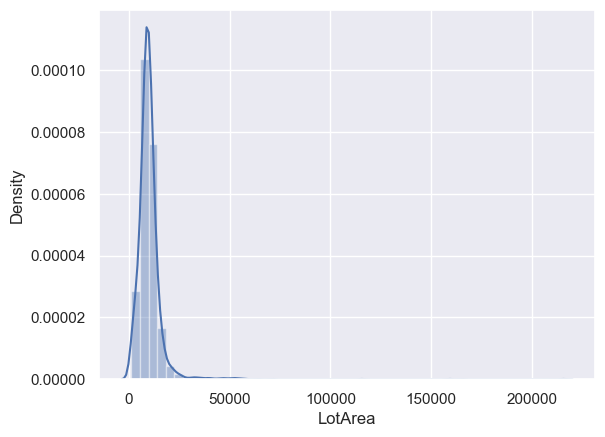

In [65]:
sns.distplot(tmp_data['LotArea']);

In [66]:
tmp_data['LotArea'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

**Box Cox Transformation**

Melakukan transformasi pada kolom-kolom yang feature-featurenya memiliki nilai skewness > 0.75

In [67]:
# Box-cox transformation untuk feature2 yg nilai skewness-nya > 0.75
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 5 skewed numerical features to Box Cox transform


In [68]:
skewness.index.tolist()

['LotArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF', 'KitchenQual']

In [69]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.20 # lambda
for feat in skewed_features:
    tmp_data[feat] = boxcox1p(tmp_data[feat], lam)

In [70]:
tmp_data

,OverallQual,OverallCond,KitchenQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,MiscFeature,LotArea
0,7,4,1.228655,17.162564,548.0,14.300394,14.300394,2003,None,25.503637
1,6,7,1.597540,15.856944,460.0,15.856944,15.856944,1976,None,26.291998
2,7,4,1.228655,17.356042,608.0,14.580417,14.580417,2001,None,27.300424
3,7,4,1.228655,17.180669,642.0,13.827349,14.751724,1915,None,26.259338
4,8,4,1.228655,18.303173,836.0,15.455351,15.455351,2000,None,28.868815
...,...,...,...,...,...,...,...,...,...,...
2914,4,6,1.597540,15.262547,0.0,12.642798,12.642798,1970,None,17.719351
2915,4,4,1.597540,15.262547,286.0,12.642798,12.642798,1970,None,17.619961
2916,5,6,1.597540,15.729901,576.0,15.729901,15.729901,1960,None,31.239346
2917,5,4,1.597540,14.788544,0.0,14.546282,14.788544,1992,Shed,26.821947


**Skewness after Box Cox Transformation**

In [71]:
# Check the skew of all numerical features
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
OverallCond,0.570312
LotArea,0.496692
1stFlrSF,0.278546
GarageArea,0.239257
GrLivArea,0.230000
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-2.156088
TotalBsmtSF,-3.555842


<Axes: xlabel='KitchenQual', ylabel='Density'>

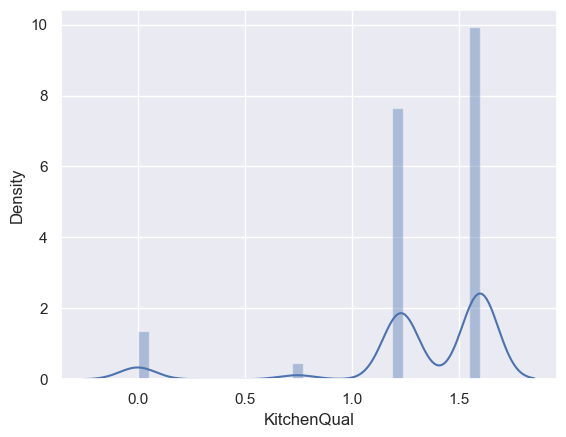

In [72]:
sns.distplot(tmp_data['KitchenQual'])

<Axes: xlabel='TotalBsmtSF', ylabel='Density'>

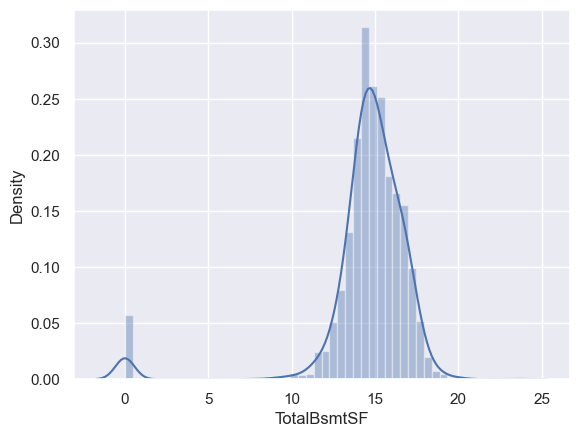

In [73]:
sns.distplot(tmp_data['TotalBsmtSF'])

**One-Hot Encoding**

In [74]:
tmp_data['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

tmp_data.info()

In [75]:
tmp_data = pd.get_dummies(tmp_data, drop_first=True) #One hot encoding untuk feature kategori di dataset
print(tmp_data.shape)

(2919, 13)


get_dummies ini akan otomatis melakukan one hot encoding ke kolom-kolom yang tipenya non numerik.

In [76]:
tmp_data

,OverallQual,OverallCond,KitchenQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,LotArea,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,7,4,1.228655,17.162564,548.0,14.300394,14.300394,2003,25.503637,True,False,False,False
1,6,7,1.597540,15.856944,460.0,15.856944,15.856944,1976,26.291998,True,False,False,False
2,7,4,1.228655,17.356042,608.0,14.580417,14.580417,2001,27.300424,True,False,False,False
3,7,4,1.228655,17.180669,642.0,13.827349,14.751724,1915,26.259338,True,False,False,False
4,8,4,1.228655,18.303173,836.0,15.455351,15.455351,2000,28.868815,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,6,1.597540,15.262547,0.0,12.642798,12.642798,1970,17.719351,True,False,False,False
2915,4,4,1.597540,15.262547,286.0,12.642798,12.642798,1970,17.619961,True,False,False,False
2916,5,6,1.597540,15.729901,576.0,15.729901,15.729901,1960,31.239346,True,False,False,False
2917,5,4,1.597540,14.788544,0.0,14.546282,14.788544,1992,26.821947,False,False,True,False


In [77]:
one_hot_columns = tmp_data.columns #Menyimpan kolom-kolom hasil encoding

**Robust Scaling**

In [78]:
# menggunakan robust scaler untuk mengurangi dampak outlier di tiap kolom
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(tmp_data)
tmp_data = scaler.transform(tmp_data)

In [79]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.5,0.0,-1.0,0.395595,0.265625,-0.285421,-0.495618,0.631579,-0.254874,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,-0.305745,-0.078125,0.500909,0.338441,0.063158,0.035514,0.0,0.0,0.0,0.0
2,0.5,0.0,-1.0,0.499525,0.500000,-0.143960,-0.345571,0.589474,0.406961,0.0,0.0,0.0,0.0
3,0.5,0.0,-1.0,0.405320,0.632812,-0.524391,-0.253778,-1.221053,0.023483,0.0,0.0,0.0,0.0
4,1.0,0.0,-1.0,1.008295,1.390625,0.298034,0.123252,0.568421,0.984668,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-1.0,2.0,0.0,-0.625037,-1.875000,-1.122796,-1.383820,-0.063158,-3.122167,0.0,0.0,0.0,0.0
2915,-1.0,0.0,0.0,-0.625037,-0.757812,-1.122796,-1.383820,-0.063158,-3.158777,0.0,0.0,0.0,0.0
2916,-0.5,2.0,0.0,-0.373989,0.375000,0.436730,0.270366,-0.273684,1.857838,0.0,0.0,0.0,0.0
2917,-0.5,0.0,0.0,-0.879657,-1.875000,-0.161204,-0.234048,0.400000,0.230717,-1.0,0.0,1.0,0.0


**Split Train Test**

In [80]:
X_train = tmp_data[:ntrain] # 50% data train
X_test = tmp_data[ntrain:]  # 50% data test

X_train.shape, X_test.shape, y_train.shape

((1460, 13), (1459, 13), (1460,))

# 4. Data Modelling

## 4.1 Kfold and Evaluation Score

In [81]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# fungsi untuk melakukan cross validation
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)

    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

## 4.2 Linear Regression

In [82]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.8439723359337691]

# 4.3 Lasso Regression

In [83]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8445830384045463]

## 4.4 Support Vector Machine

In [84]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
test_model(svr_reg)

[0.8440642654699704]

## 4.5 XGBoost

In [85]:
!pip install --upgrade xgboost

In [86]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.8408284419979712]

In [87]:
all_data

,OverallQual,OverallCond,KitchenQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,MiscFeature,LotArea
0,7,5,Gd,1710,548.0,856.0,856,2003,None,8450
1,6,8,TA,1262,460.0,1262.0,1262,1976,None,9600
2,7,5,Gd,1786,608.0,920.0,920,2001,None,11250
3,7,5,Gd,1717,642.0,756.0,961,1915,None,9550
4,8,5,Gd,2198,836.0,1145.0,1145,2000,None,14260
...,...,...,...,...,...,...,...,...,...,...
2914,4,7,TA,1092,0.0,546.0,546,1970,None,1936
2915,4,5,TA,1092,286.0,546.0,546,1970,None,1894
2916,5,7,TA,1224,576.0,1224.0,1224,1960,None,20000
2917,5,5,TA,970,0.0,912.0,970,1992,Shed,10441


# 5. Memprediksi data baru dengan SVR

In [88]:
model = svr_reg.fit(X_train, y_train)

In [89]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.5,0.0,-1.0,0.395595,0.265625,-0.285421,-0.495618,0.631579,-0.254874,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,-0.305745,-0.078125,0.500909,0.338441,0.063158,0.035514,0.0,0.0,0.0,0.0
2,0.5,0.0,-1.0,0.499525,0.500000,-0.143960,-0.345571,0.589474,0.406961,0.0,0.0,0.0,0.0
3,0.5,0.0,-1.0,0.405320,0.632812,-0.524391,-0.253778,-1.221053,0.023483,0.0,0.0,0.0,0.0
4,1.0,0.0,-1.0,1.008295,1.390625,0.298034,0.123252,0.568421,0.984668,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-1.0,2.0,0.0,-0.625037,-1.875000,-1.122796,-1.383820,-0.063158,-3.122167,0.0,0.0,0.0,0.0
2915,-1.0,0.0,0.0,-0.625037,-0.757812,-1.122796,-1.383820,-0.063158,-3.158777,0.0,0.0,0.0,0.0
2916,-0.5,2.0,0.0,-0.373989,0.375000,0.436730,0.270366,-0.273684,1.857838,0.0,0.0,0.0,0.0
2917,-0.5,0.0,0.0,-0.879657,-1.875000,-0.161204,-0.234048,0.400000,0.230717,-1.0,0.0,1.0,0.0


In [90]:
tmp_data[0].reshape(1,-1)

array([[ 0.5       ,  0.        , -1.        ,  0.39559454,  0.265625  ,
        -0.28542058, -0.49561781,  0.63157895, -0.25487439,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [91]:
model.predict(tmp_data[0].reshape(1,-1)) # coba prediksi baris pertama dataset kita

array([12.22596131])

In [92]:
np.expm1(12.22596131) # expm1(x) = e^x - 1, atau invers dari ln

204016.55233849

In [93]:
np.expm1(y_train[0])

208499.99999999983

In [94]:
all_data

,OverallQual,OverallCond,KitchenQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,MiscFeature,LotArea
0,7,5,Gd,1710,548.0,856.0,856,2003,None,8450
1,6,8,TA,1262,460.0,1262.0,1262,1976,None,9600
2,7,5,Gd,1786,608.0,920.0,920,2001,None,11250
3,7,5,Gd,1717,642.0,756.0,961,1915,None,9550
4,8,5,Gd,2198,836.0,1145.0,1145,2000,None,14260
...,...,...,...,...,...,...,...,...,...,...
2914,4,7,TA,1092,0.0,546.0,546,1970,None,1936
2915,4,5,TA,1092,286.0,546.0,546,1970,None,1894
2916,5,7,TA,1224,576.0,1224.0,1224,1960,None,20000
2917,5,5,TA,970,0.0,912.0,970,1992,Shed,10441


In [95]:
# Input data baru
data_baru = {'LotArea': [8000],
             'YearBuilt':[2010],
             'OverallQual':['8'],
             'OverallCond':['7'],
             'GrLivArea':[2000],
            'MiscFeature':['None'],
             'GarageArea': [500],
             'KitchenQual': ['TA'],
            '1stFlrSF' : [856],
            'TotalBsmtSF': [856]}

In [96]:
tmp = pd.DataFrame(data_baru)

In [97]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,1stFlrSF,TotalBsmtSF
0,8000,2010,8,7,2000,None,500,TA,856,856


In [98]:
data_baru_tf = data_baru.copy()

In [99]:
#pre processing label encoding untuk data baru
data_baru_tf['OverallQual'] = encoders['OverallQual'].transform(tmp['OverallQual'])[0]
data_baru_tf['OverallCond'] = encoders['OverallCond'].transform(tmp['OverallCond'])[0]
data_baru_tf['KitchenQual'] = encoders['KitchenQual'].transform(tmp['KitchenQual'])[0]

In [100]:
# transformasi boxcox untuk kolom LotArea, GrLivArea, dan KitchenQual
data_baru_tf['LotArea'] = boxcox1p(tmp['LotArea'], lam)[0]
data_baru_tf['GrLivArea'] = boxcox1p(tmp['GrLivArea'], lam)[0]
data_baru_tf['KitchenQual'] = boxcox1p(data_baru_tf['KitchenQual'], lam)

In [101]:
tmp = pd.DataFrame(data_baru_tf)

In [102]:
tmp = pd.get_dummies(tmp, columns = ['MiscFeature'])

In [103]:
one_hot_columns #Perlu tambahkan kolom hasil one-hot encoding lainnya seperti di data training

Index(['OverallQual', 'OverallCond', 'KitchenQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'LotArea', 'MiscFeature_None',
       'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object')

In [104]:
# Menambahkan kolom-kolom yang hilang pada data baru
for kolom in one_hot_columns:
    if kolom not in tmp.columns:
        tmp[kolom] = 0

In [105]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,1stFlrSF,TotalBsmtSF,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.171636,2010,8,6,17.867539,500,1.59754,856,856,True,0,0,0


In [106]:
# Lakukan scaling
tmp_scaled = scaler.transform(tmp.loc[0].values.reshape(1,-1))

In [107]:
# Harga rumah hasil prediksi
y = np.expm1(model.predict(tmp_scaled))
print(y)

[166948.04240376]


In [108]:
pd.DataFrame(data_baru)

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,1stFlrSF,TotalBsmtSF
0,8000,2010,8,7,2000,None,500,TA,856,856
